# Parabilic SAR AF パラメータとロスカットのスクリーニング・チェック

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)

In [14]:
def plot(df, date_target, code):
    FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
    fm.fontManager.addfont(FONT_PATH)
    
    # FontPropertiesオブジェクト生成（名前の取得のため）
    font_prop = fm.FontProperties(fname=FONT_PATH)
    font_prop.get_name()
    
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.size'] = 16
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    
    x = df['af_step']
    n = len(df.columns)
    list_losscut = df.columns[n-3:n]
    for losscut in list_losscut:
        y = df[losscut]
        if type(losscut) is str:
            label_str = 'Loss Cut = none'
        else:
            label_str = 'Loss Cut =-%dx呼値' % losscut
        ax.plot(x, y, lw=1, label=label_str)
    
    ax.axhline(0, color='black', lw=0.5)
    ax.set_xscale('log')
    ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
    ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)
    
    ax.set_xlabel('AF step')
    ax.set_ylabel('Profit (JPY)')
    
    ax.legend(fontsize=9)
    ax.set_title('tick data on %s with AF[init] = 0 and AF[max] = AF[step]x10' % date_target, fontsize=10)
    
    plt.suptitle('%s : AF dependency in Parabolic SAR' % code, fontsize=16)
    plt.savefig('./study_201_AF_LossCut/%s_%s.png' % (date_target, code))
    plt.show()

In [3]:
date_target = '2025-04-02'
path_base = '../doe/results_Simple_SAR_LossCut'

## 三菱重工業 (7011)

     #  af_init  af_step   af_max   none      3   6
0    1        0  0.00001  0.00010   6700   1250 NaN
1    2        0  0.00002  0.00020   8900   2350 NaN
2    3        0  0.00003  0.00030  10400   3050 NaN
3    4        0  0.00005  0.00050   3600   4400 NaN
4    5        0  0.00007  0.00075   3700   5850 NaN
5    6        0  0.00010  0.00100   3400   9200 NaN
6    7        0  0.00020  0.00200  13300  12750 NaN
7    8        0  0.00030  0.00300  11700   9700 NaN
8    9        0  0.00050  0.00500  12900   7850 NaN
9   10        0  0.00075  0.00750   7000   8600 NaN
10  11        0  0.00100  0.01000   9000  11650 NaN
11  12        0  0.00200  0.02000  -1900    550 NaN
12  13        0  0.00300  0.03000    800   4000 NaN
13  14        0  0.00500  0.05000  -3800  -2700 NaN
14  15        0  0.00750  0.07500   -900   2300 NaN
15  16        0  0.01000  0.10000   1000   3200 NaN
16  17        0  0.02000  0.20000  -2100   -450 NaN
17  18        0  0.03000  0.30000  -2700  -4600 NaN
18  19      

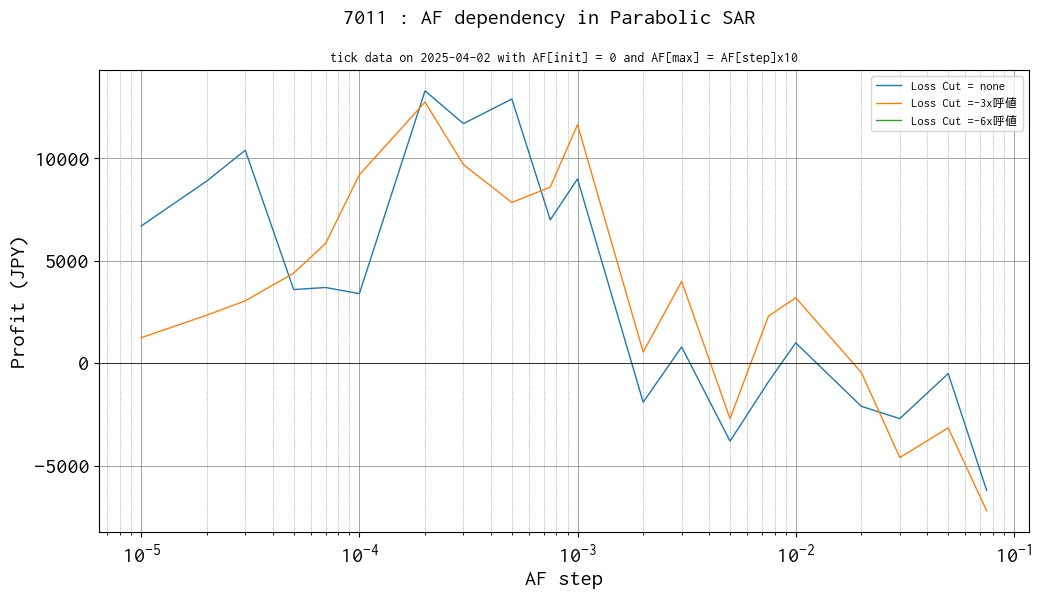

In [17]:
code = '7011'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)

## トヨタ自動車 (7203)

     #  af_init  af_step   af_max   none      3   6
0    1        0  0.00001  0.00010    700    800 NaN
1    2        0  0.00002  0.00020   2000   1450 NaN
2    3        0  0.00003  0.00030   3000   1950 NaN
3    4        0  0.00005  0.00050   3500   1950 NaN
4    5        0  0.00007  0.00075   2600  -1900 NaN
5    6        0  0.00010  0.00100   4300   2200 NaN
6    7        0  0.00020  0.00200   6300   1850 NaN
7    8        0  0.00030  0.00300   5500   3200 NaN
8    9        0  0.00050  0.00500   4000  -3150 NaN
9   10        0  0.00075  0.00750  -2900    300 NaN
10  11        0  0.00100  0.01000   -600  -2100 NaN
11  12        0  0.00200  0.02000  -1900  -1550 NaN
12  13        0  0.00300  0.03000  -1400   -550 NaN
13  14        0  0.00500  0.05000  -1800  -4900 NaN
14  15        0  0.00750  0.07500  -4800  -8750 NaN
15  16        0  0.01000  0.10000  -5200  -7200 NaN
16  17        0  0.02000  0.20000 -11700 -10250 NaN
17  18        0  0.03000  0.30000 -13400 -12950 NaN
18  19      

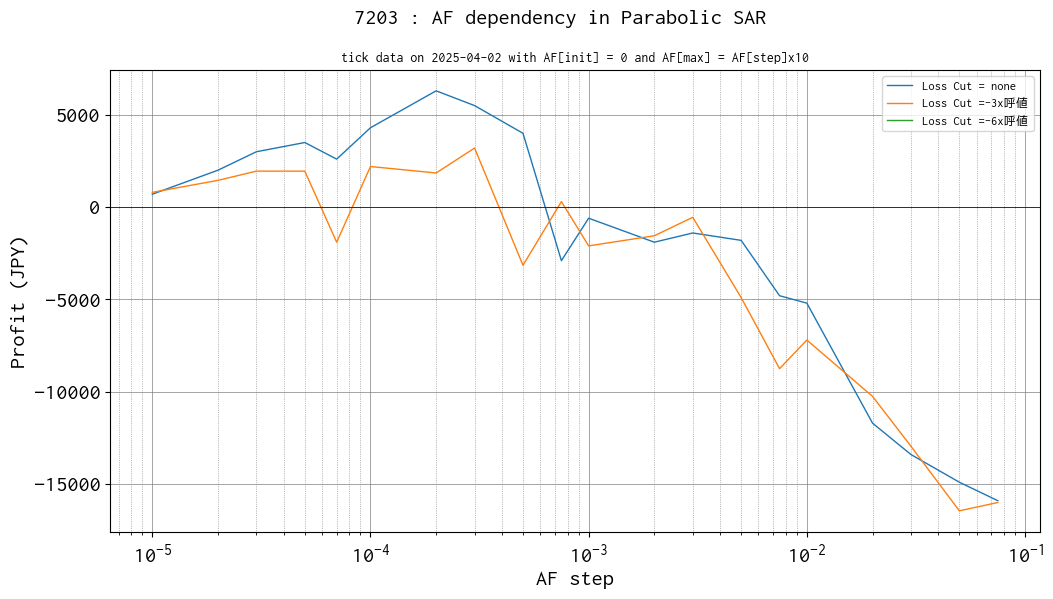

In [18]:
code = '7203'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)

## 三菱ＵＦＪフィナンシャルＧ (8306)

     #  af_init  af_step   af_max  none     3   6
0    1        0  0.00001  0.00010  2200  2200 NaN
1    2        0  0.00002  0.00020  3400  2600 NaN
2    3        0  0.00003  0.00030  4500  3150 NaN
3    4        0  0.00005  0.00050  3700  2750 NaN
4    5        0  0.00007  0.00075  1200  2950 NaN
5    6        0  0.00010  0.00100  2600  2700 NaN
6    7        0  0.00020  0.00200  1700  1850 NaN
7    8        0  0.00030  0.00300  -300   500 NaN
8    9        0  0.00050  0.00500   600  2450 NaN
9   10        0  0.00075  0.00750   700   850 NaN
10  11        0  0.00100  0.01000   100  1050 NaN
11  12        0  0.00200  0.02000 -5400 -2950 NaN
12  13        0  0.00300  0.03000 -2700 -3900 NaN
13  14        0  0.00500  0.05000 -2000 -1350 NaN
14  15        0  0.00750  0.07500 -3300 -3750 NaN
15  16        0  0.01000  0.10000 -5000 -3650 NaN
16  17        0  0.02000  0.20000 -2900 -3600 NaN
17  18        0  0.03000  0.30000 -5400 -6050 NaN
18  19        0  0.05000  0.50000 -8800 -9250 NaN


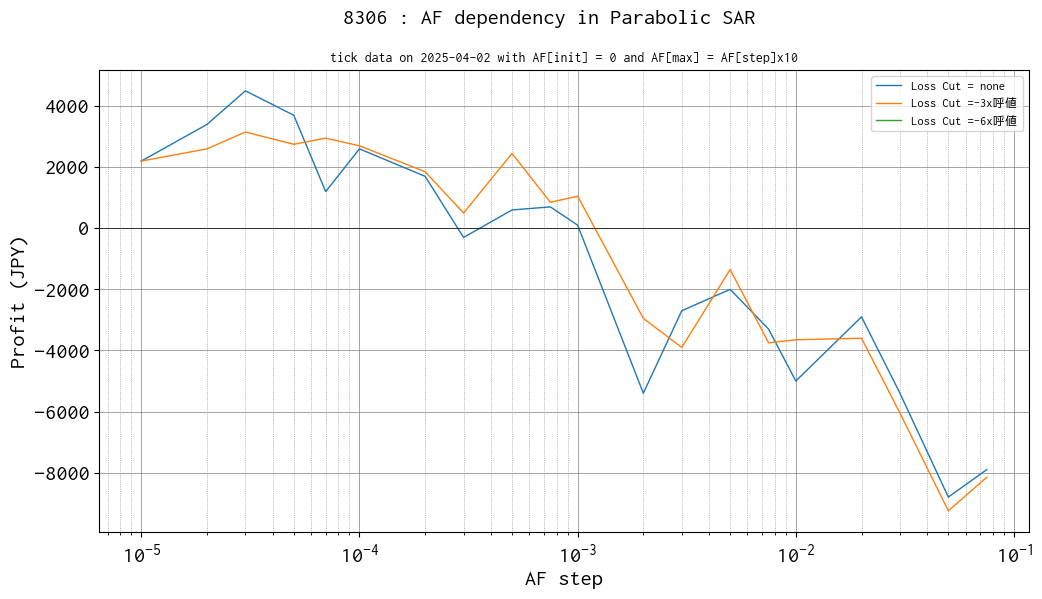

In [19]:
code = '8306'
ods_name = os.path.join(path_base, 'summary_%s_%s.ods' % (date_target, code))
ods_name
df = pd.read_excel(ods_name)
print(df)
plot(df, date_target, code)